In [223]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [224]:
def objective_cost_function(N,city_tour,c_loc):
    total_cost = 0
    for i in range(N-1):
        start = city_tour[i]
        dest = city_tour[i+1]
        c_loc = np.asarray(c_loc)
        city_start = c_loc[start]
        city_dest = c_loc[dest]
        diff = city_dest - city_start
        total_cost += np.linalg.norm(diff,ord=2)
    return total_cost

In [225]:
def city_locations(N):
    city_loc = []
    for i in range(N):
        boundary = range(0,1000)
        city_loc.append(random.sample(boundary,2))
    return city_loc

In [226]:
def decay_temp(temp_type,i,init_temp):
    if temp_type == 'exp':
        decay_t = init_temp*( 0.80 ** (i + 1) ) 
    elif temp_type == 'log':
        alpha = 1.1
        decay_t = init_temp/(1+alpha*np.log(1+i))   #sometimes just log(1+i) or 1+log(1+i)
    elif temp_type == 'poly':
        alpha = 0.1
        decay_t = init_temp/(1+alpha*i)
    else:
        print('incorrect cooling function')
    return decay_t

In [227]:
def travel_anneal(N,num_runs):
    final_cost = []
    c_loc = city_locations(N)
    city_tour = random.sample(range(0,N),N)
    init_tour = city_tour[:]
   
    for i in range(num_runs):
        sw_pos =  random.sample(range(N),2)
        sw_city_tour = city_tour[:]
        sw_city_tour[sw_pos[1]] = city_tour[sw_pos[0]]
        sw_city_tour[swap_positions[0]] = city_tour[swap_positions[1]]

        cost = objective_cost_function(N,city_tour,c_loc)
        sw_cost = objective_cost_function(N,sw_city_tour,c_loc)

        t_decay = decay_temp('exp',i,100)

        acc_prob = np.min([1, np.exp(-1 * (sw_cost - cost)/ t_decay)]) 
        if acc_prob > np.random.uniform():
            city_tour = sw_city_tour[:]
            final_cost.append(sw_cost)
                
    return city_tour, init_tour, final_cost , c_loc

In [228]:
num_cities = 10
city_tour, init_tour, final_cost, c_loc = travel_anneal(num_cities,100)

prev_x = list(zip(*[c_loc[init_tour[i % num_cities]] for i in range(num_cities+1)]))[0]
prev_y = list(zip(*[c_loc[init_tour[i % num_cities]] for i in range(num_cities+1)]))[1]
new_x = list(zip(*[c_loc[city_tour[i % num_cities]] for i in range(num_cities+1)]))[0]
new_y = list(zip(*[c_loc[city_tour[i % num_cities]] for i in range(num_cities+1)]))[1]

Text(0.5,1,'Number of Cities = 10')

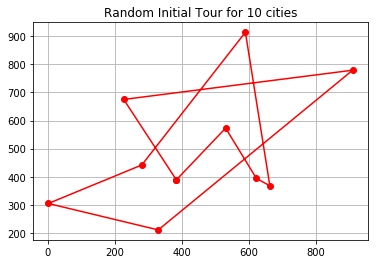

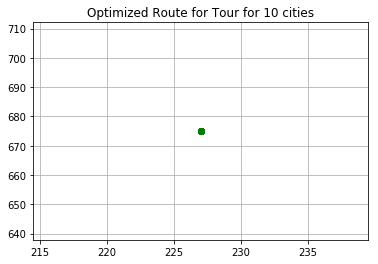

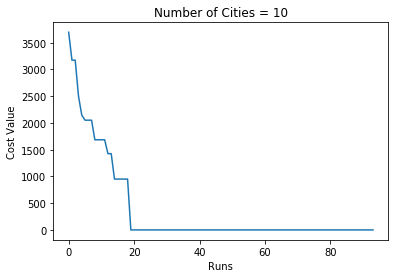

In [229]:
plot_city_tour(num_cities,prev_x,prev_y,'r','Random Initial Tour')
plot_city_tour(num_cities,new_x,new_y,'g','Optimized Route for Tour')
plt.figure()
plt.plot(final_cost)
plt.xlabel('Runs')
plt.ylabel('Cost Value')
plt.title('Number of Cities = '+str(num_cities))

In [222]:
def plot_city_tour(num_cities,x,y,color,title):
    plt.figure()
    plt.plot(x,y, marker='o', color=color)
    plt.grid('on')
    plt.title(title+" for "+str(num_cities)+" cities")